<a href="https://www.kaggle.com/code/nickrod068/eda-forbes-billionaires-2022-qep-final-project?scriptVersionId=127936651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

<center><a data-flickr-embed="true" href="https://www.flickr.com/photos/198203452@N05" title=""><img src="https://live.staticflickr.com/65535/52859140435_e72461c7ea_z.jpg" width="940" height="780" alt=""/></a></center><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


In [2]:
df = pd.read_csv("/kaggle/input/forbes-billionaires-2022/2022_forbes_billionaires.csv")

<center><a data-flickr-embed="true" href="https://www.flickr.com/photos/198203452@N05/52858759061/in/dateposted-public/" title="EDA Data Description"><img src="https://live.staticflickr.com/65535/52858759061_6a795bd154_z.jpg" width="940" height="780" alt="EDA Data Description"/></a></center><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [3]:
# Overview of first 5 rows
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [4]:
# Dataframe shape
df.shape

(2600, 8)

In [5]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [6]:
# Statistics summary
df.describe()

,Unnamed: 0,rank,age
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,1269.570769,64.271923
std,750.699674,728.146364,13.220607
min,0.000000,1.000000,19.000000
25%,649.750000,637.000000,55.000000
50%,1299.500000,1292.000000,64.000000
75%,1949.250000,1929.000000,74.000000
max,2599.000000,2578.000000,100.000000


<center><a data-flickr-embed="true" href="https://www.flickr.com/photos/198203452@N05/52858185087/in/dateposted-public/" title="EDA Data Cleaning"><img src="https://live.staticflickr.com/65535/52858185087_598a7c3584_z.jpg" width="940" height="780" alt="EDA Data Cleaning"/></a></center><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [7]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64


In [8]:
# Drop rows with null values
df = df.dropna()

# Drop columns with null values
df = df.dropna(axis=1)

<center><a data-flickr-embed="true" href="https://www.flickr.com/photos/198203452@N05/52859156165/in/dateposted-public/" title="EDA Header"><img src="https://live.staticflickr.com/65535/52859156165_c0bb0ec6aa_z.jpg" width="940" height="780" alt="EDA Header"/></a></center><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<center><strong><font size="20">Exploring Billionaires by Country</font></strong></center>


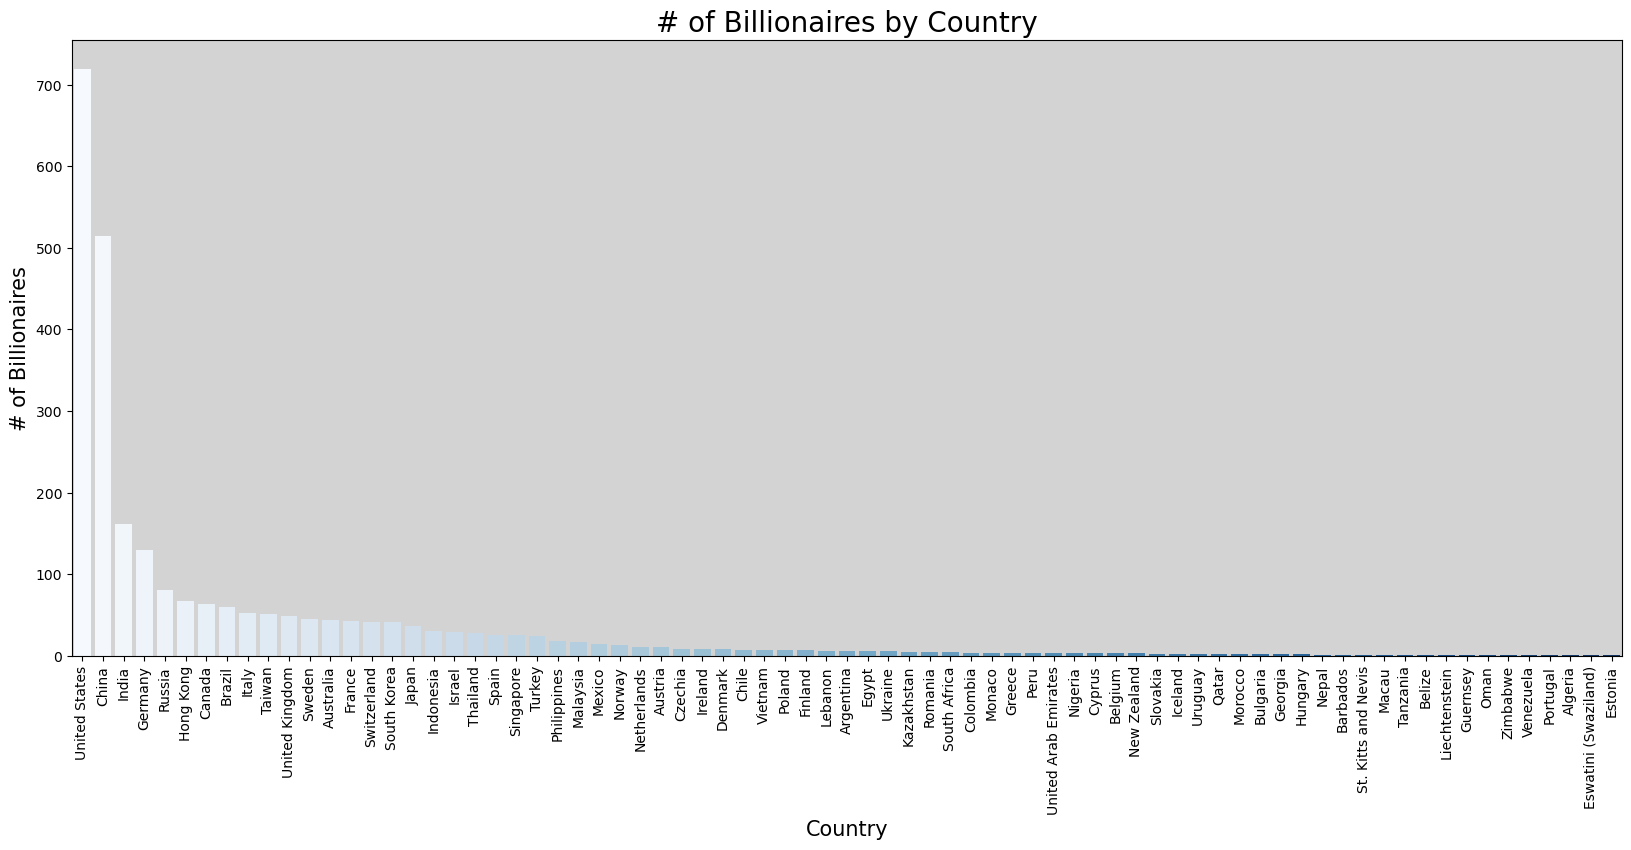

In [9]:
# Define the color palette as a spectrum of blues
palette = sns.color_palette("Blues", n_colors=len(df['country'].unique()))

# Plot the countplot with the defined color palette
plt.figure(figsize=(20,8))
sns.countplot(data=df, x="country", order=df['country'].value_counts().index, palette=palette)
plt.xticks(rotation=90)
plt.ylabel("# of Billionaires", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.title("# of Billionaires by Country", fontsize=20)
plt.gca().set_facecolor('lightgray')
plt.show()


In [10]:
# Description of top 10 countries with most billionaires
top_countries = df['country'].value_counts().nlargest(10)

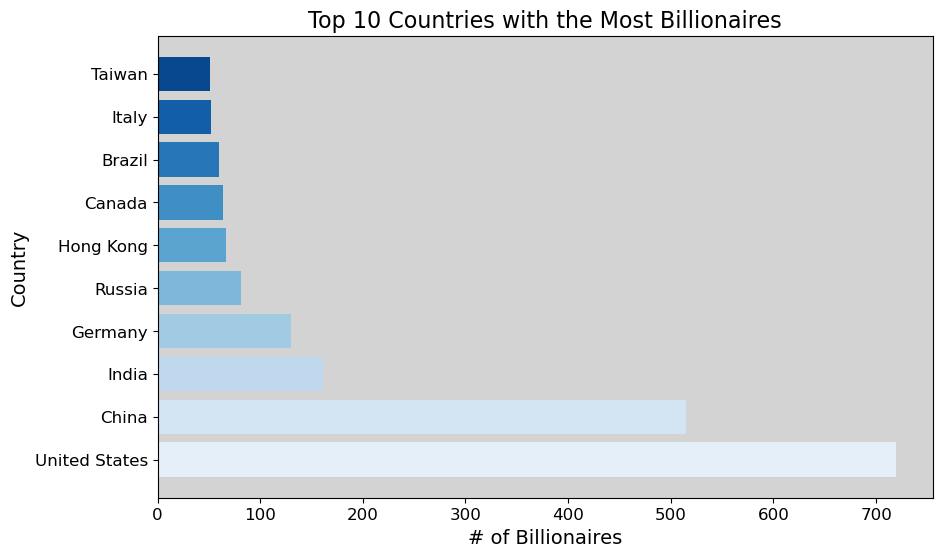

United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: country, dtype: int64


In [11]:
# Define the color palette as a spectrum of blues
colors = sns.color_palette("Blues", 10)

# Create bar chart
plt.figure(figsize=(10,6))
plt.barh(top_countries.index, top_countries.values, color=colors)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.ylabel('Country', fontsize=14)
plt.xlabel('# of Billionaires', fontsize=14)
plt.title('Top 10 Countries with the Most Billionaires', fontsize=16)
plt.gca().set_facecolor('lightgray')
plt.show()

# Print top 10 countries with most billionaires
print(top_countries)

<center><strong><font size="20">Age Distribution of Billionaires</font></strong></center>

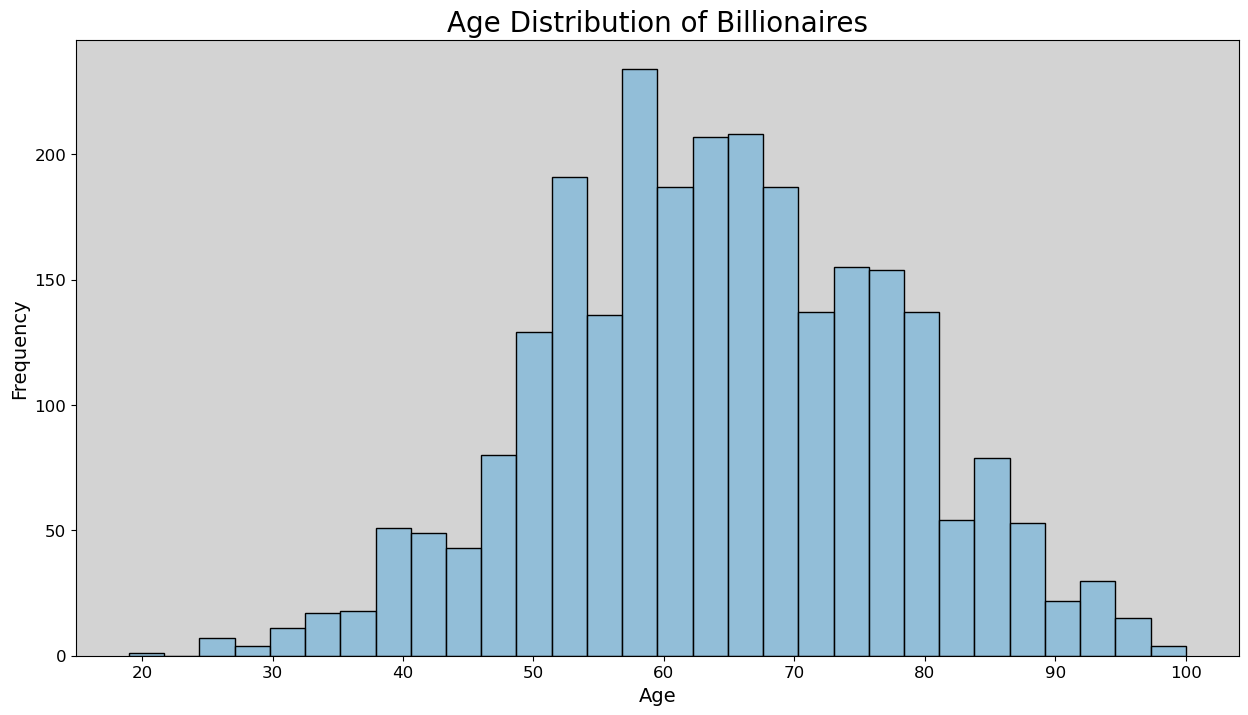

In [12]:
# Define the color palette as a spectrum of blues
colors = sns.color_palette("Blues", 10)

# Create histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='age', color=colors[4])
plt.title('Age Distribution of Billionaires', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('lightgray')
plt.show()

In [13]:
df['age_group'] = pd.cut(df['age'], bins = [18, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry,age_group
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,30-50
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,50-70
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,70+
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,50-70
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,70+


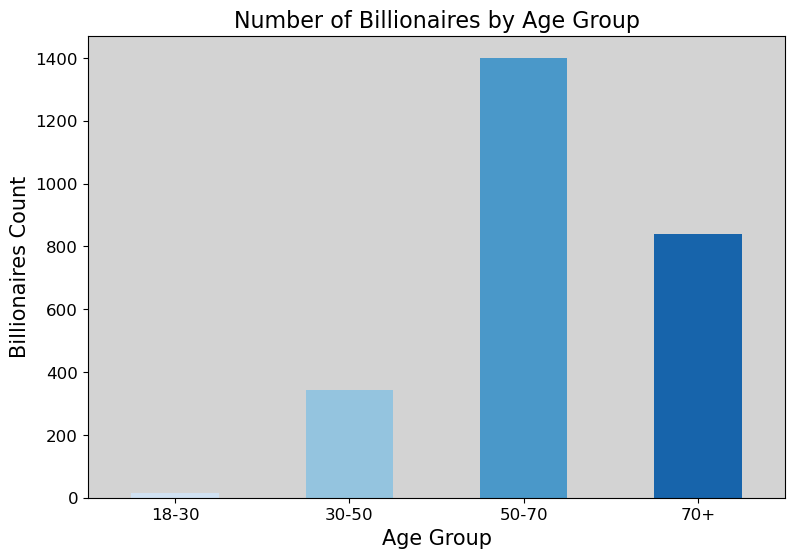

In [14]:
# Define the color palette as a spectrum of blues
colors = sns.color_palette("Blues", 4)

# Create bar chart
plt.figure(figsize=(9,6))
df['age_group'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Billionaires Count", fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of Billionaires by Age Group", fontsize=16)
plt.gca().set_facecolor('lightgray')
plt.show()

<center><strong>From these graphs we can conclude that most billionaires are between 50 & 70 years old.</strong></center>

<center><strong><font size="20">Billionaires by Industry</font></strong></center>


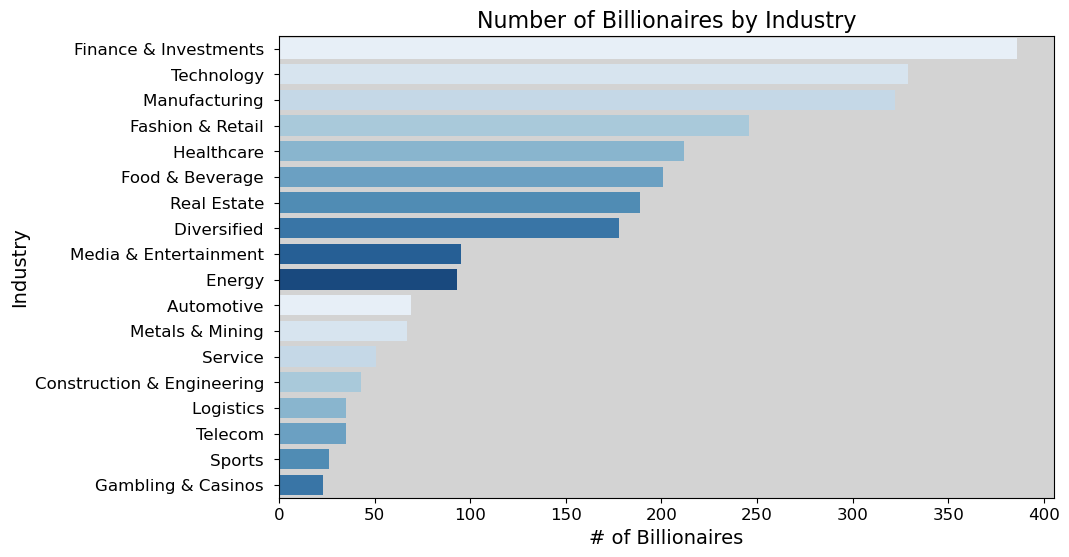

In [15]:
# Define the color palette as a spectrum of blues
colors = sns.color_palette("Blues", 10)

# Create bar chart
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="industry", order=df['industry'].value_counts().index, palette=colors)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('# of Billionaires', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.title('Number of Billionaires by Industry', fontsize=16)
plt.gca().set_facecolor('lightgray')
plt.show()

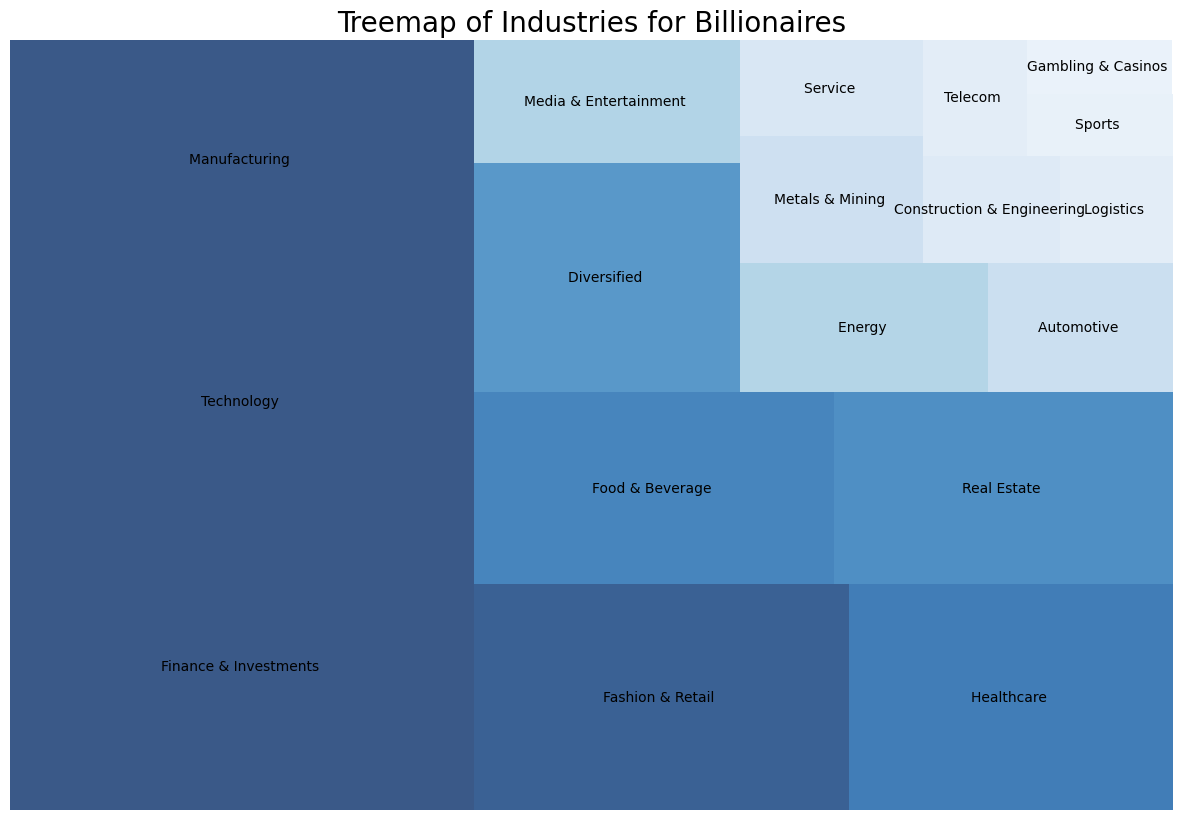

In [16]:
# Calculate the value counts for each source
source_counts = df['industry'].value_counts()

# Create a color map
cmap = plt.cm.Blues

# Define the size of the figure
plt.figure(figsize=(15, 10))

# Generate the Treemap
squarify.plot(sizes=source_counts.values, label=source_counts.index, alpha=.8, color=cmap(source_counts.values))
plt.axis('off')

# Add a title
plt.title('Treemap of Industries for Billionaires', fontsize=20)

# Increase the font size of the labels
plt.rc('font', size= 6)

# Show the plot
plt.show()

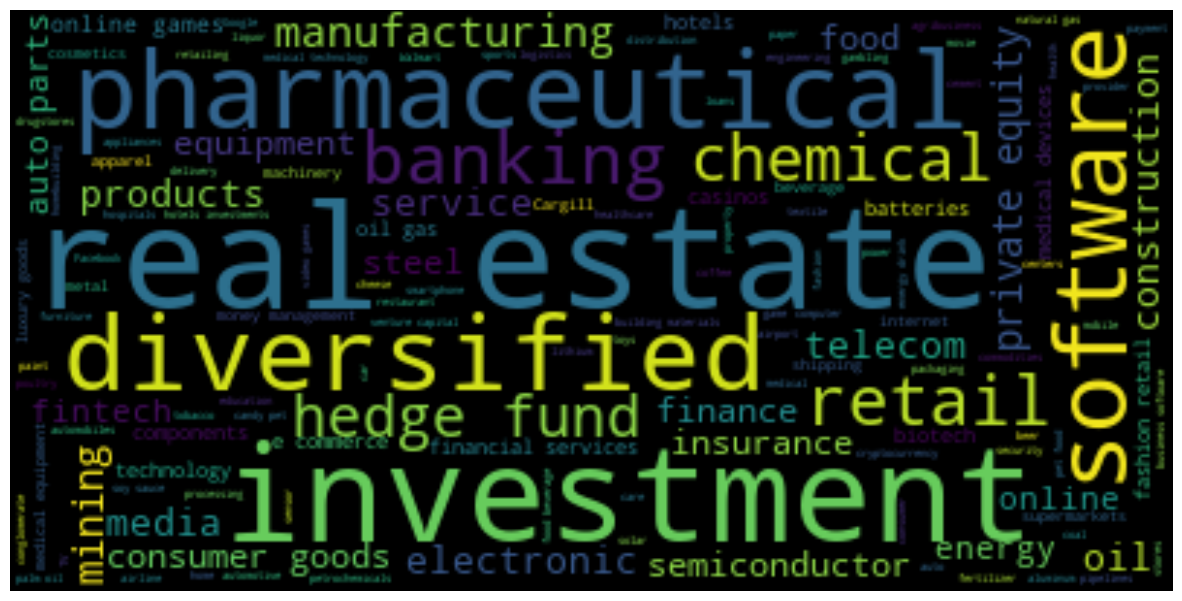

In [17]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in df.source) 

plt.figure( figsize=(15,10))
wordcloud = WordCloud(
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=50, 
                      random_state=50
                     ).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();

<center><strong><font size="20">Who are the top billionaires and where does their money come from?</font></strong></center>